# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>



### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 31.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [ ]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv',
                      parse_dates=['date'])

# Preliminary Data Exploration

Checking out these two DataFrames ☝️.
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [ ]:
print(f'{df_yearly.shape}')
print(f'{df_monthly.shape}')

# df_yearly have 12 rows and 4 colummns
# df_monthly have 98 rows and 3 columns



(12, 4)
(98, 3)
Index(['year', 'births', 'deaths', 'clinic'], dtype='object')
Index(['date', 'births', 'deaths'], dtype='object')


In [ ]:
print(f'{df_yearly.columns}')
# df_yearly columns' names are year, births, deaths, clinic

print(f'{df_monthly.columns}')
# df_monthly columns' names are date, birth, deaths

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')
Index(['date', 'births', 'deaths'], dtype='object')


### Check for Nan Values and Duplicates

In [ ]:
# Checking for NaN values

df_yearly.isna().values.sum()
df_yearly.duplicated().sum()
# df_yearly have no NaN and duplicated values

df_monthly.isna().values.sum()
df_monthly.duplicated().sum()
# df_monthly have no NaN and duplicated values



0

### Descriptive Statistics

In [ ]:
# Checking descriptive statistics for df_yearly

# df_yearly.describe()

# It can be seen that, in the yearly data
# Highest births were 4010 and 518 deaths

df_monthly.describe()
# In monthly data, highest births were 401 with 65 deaths


,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


### Percentage of Women Dying in Childbirth

How dangerous was childbirth in the 1840s in Vienna?

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [ ]:
# Calculating the percentage of woman died giving birth throughout 1840s

sum_yearly_births = df_yearly.births.sum()
sum_yearly_deaths = df_yearly.deaths.sum()

# print(sum_yearly_deaths, sum_yearly_births)

deaths_pct = (sum_yearly_deaths / sum_yearly_births) * 100
print(f'The death rate is: {deaths_pct: .3}%')

The death rate is:  7.08%


# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

Create a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes. It should look something like this:


* Format the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively.
* Do you notice anything in the late 1840s?

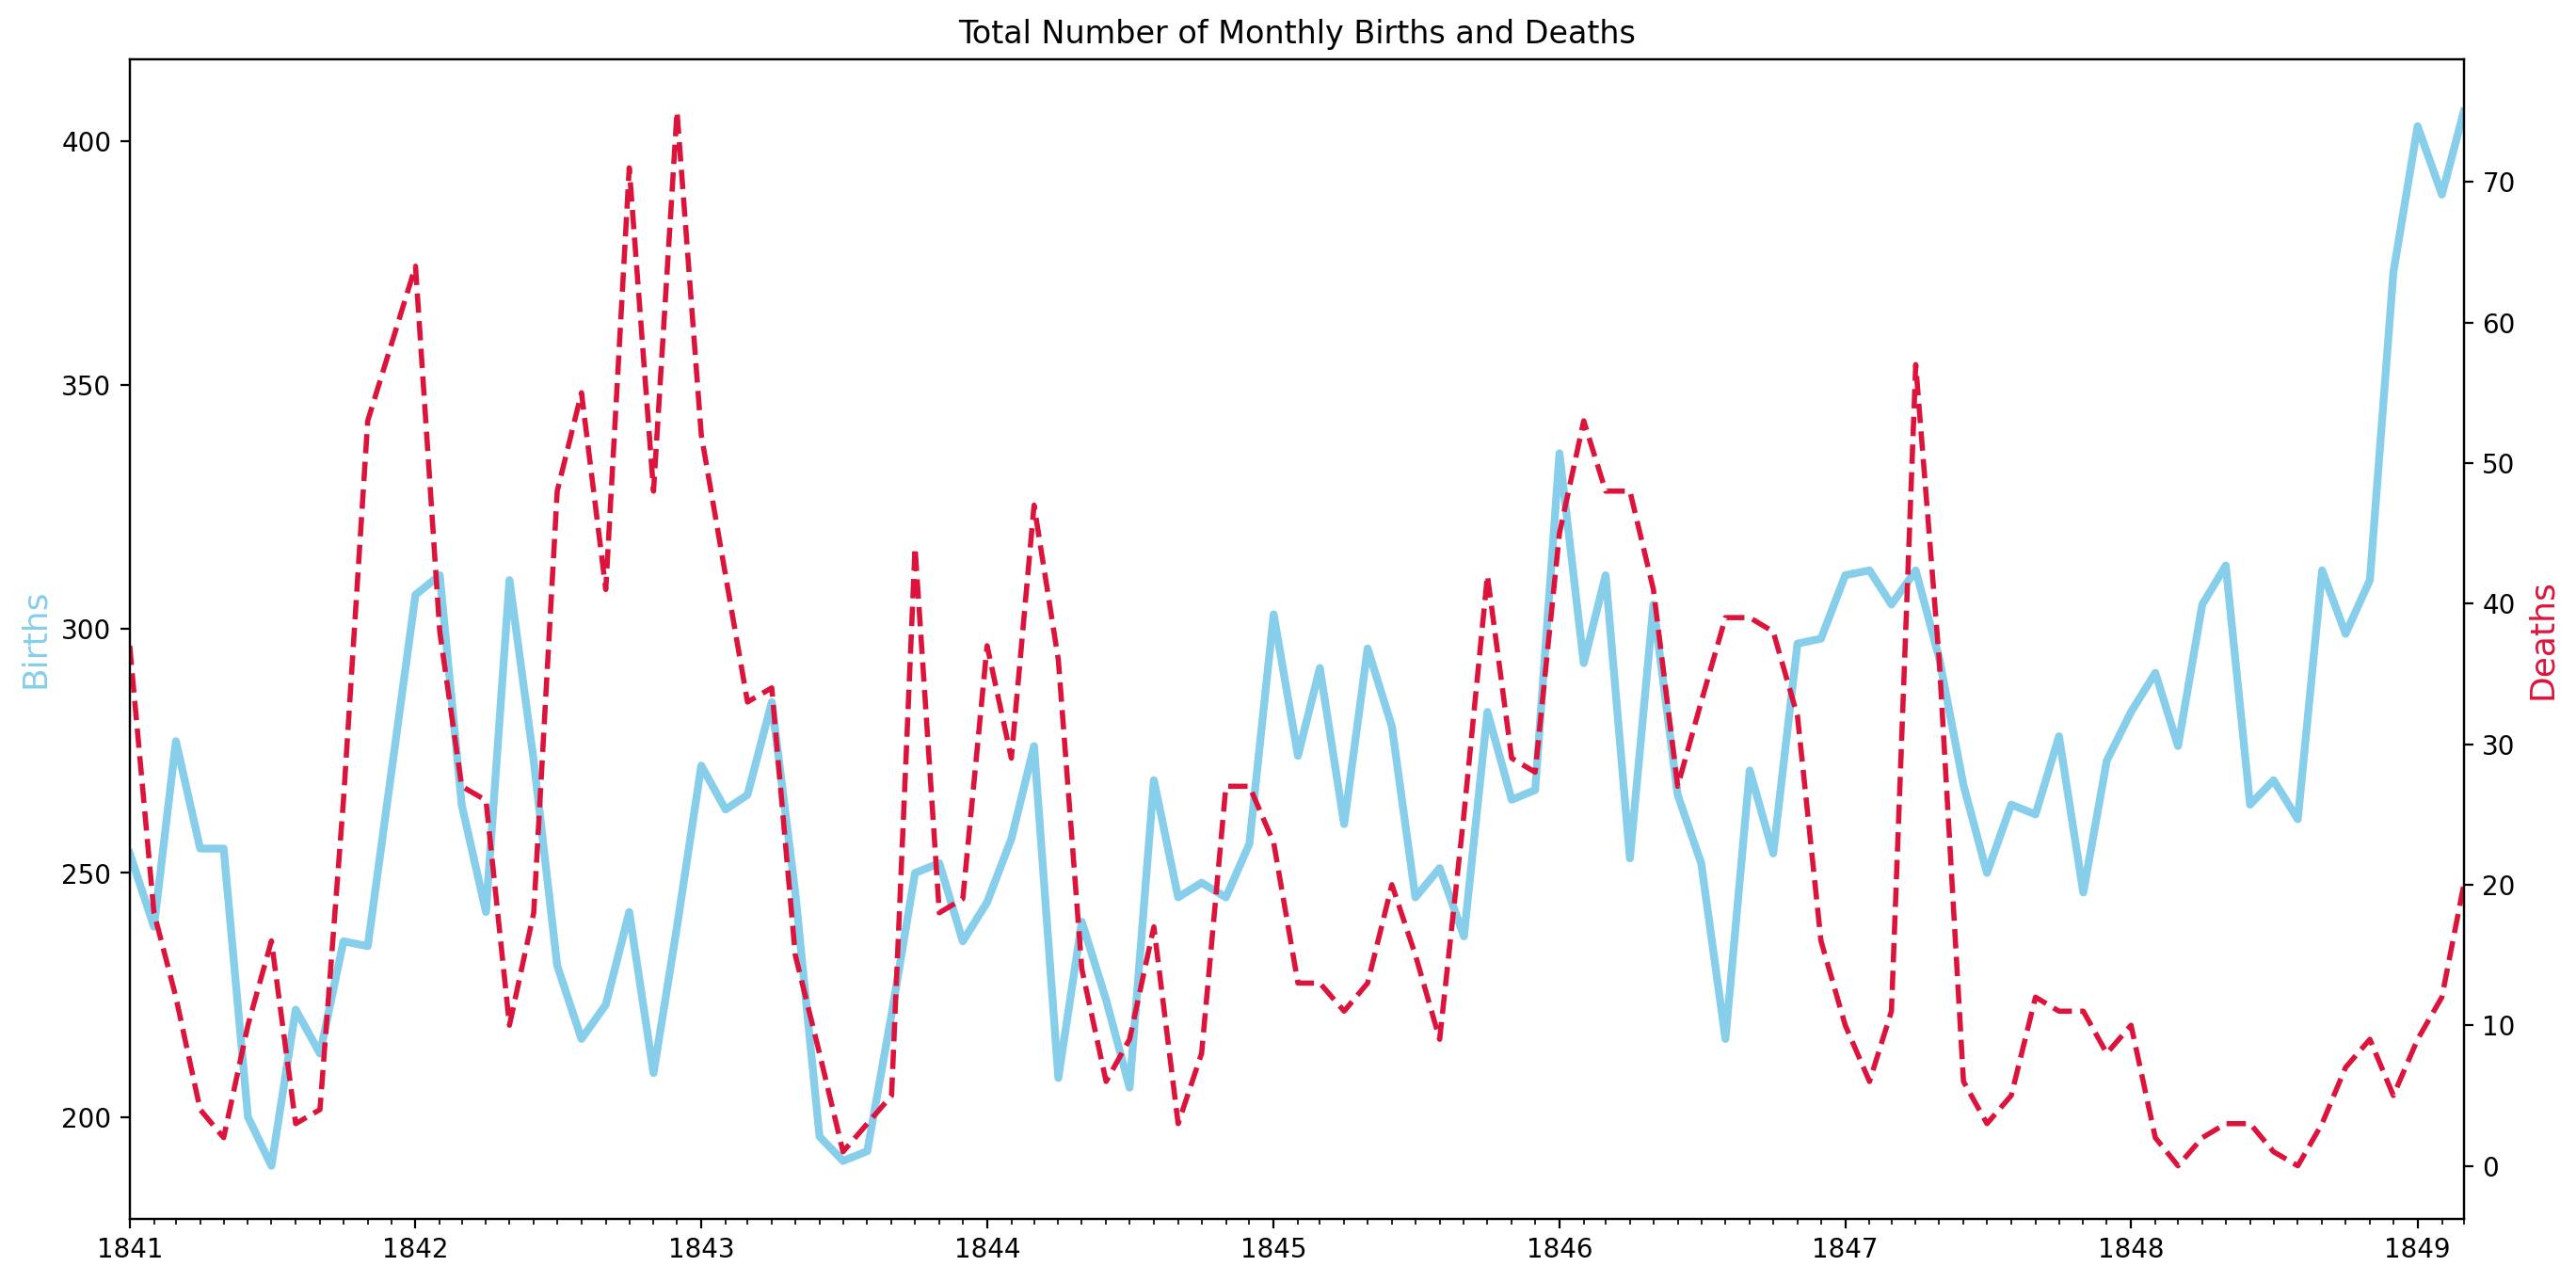

In [ ]:
# Setting up the chart

plt.figure(figsize=(16,8), dpi=200)

plt.title('Total Number of Monthly Births and Deaths')

# Setting up the locators

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

# Capturing the axis

ax1 = plt.gca()
ax2 = ax1.twinx() # Using the same x - axis

ax1.plot(df_monthly.date, df_monthly.births, color='skyblue', linewidth=3)
ax2.plot(df_monthly.date, df_monthly.deaths, linestyle='--', color='crimson', linewidth=2)

# Setting up the labels

ax1.set_ylabel('Births', fontsize=13, color='skyblue')
ax2.set_ylabel('Deaths', fontsize=13, color='crimson')

# Use the locators to set up the tickmarks

ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)





In [ ]:
# From the data, deaths rate skyrocket when birth ratespikes

# However, following 1847, the death rate drops when birth rate spikes

# The Yearly Data Split by Clinic

Now let's look at the annual data instead.

Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital.
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time?
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [ ]:
# Plot the line chart using df_yearly

fig = px.line(df_yearly, x='year', y='births', color='clinic')
fig.show()

# It can be seen that clinic 1 is busier than clinic 2, signficantly in early 1841
# Number of patient tend to increase over time

In [ ]:
# Plotting no. deaths by clinics

fig = px.line(df_yearly, x='year', y='deaths', color='clinic')

fig.show()

# Clinic 1 has signficantly higher death than clinc 2

# Highest death was recorded in 1842. Wonder

### Calculate the Proportion of Deaths at Each Clinic

Calculate the proportion of maternal deaths per clinic. That way we can compare like with like.
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths".
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [ ]:
deaths_pct_series = df_yearly.deaths / df_yearly.births

df_yearly.insert(3, 'pct_deaths', deaths_pct_series)

df_yearly

,year,births,deaths,pct_deaths,clinic
0,1841,3036,237,0.08,clinic 1
1,1842,3287,518,0.16,clinic 1
2,1843,3060,274,0.09,clinic 1
3,1844,3157,260,0.08,clinic 1
4,1845,3492,241,0.07,clinic 1
5,1846,4010,459,0.11,clinic 1
6,1841,2442,86,0.04,clinic 2
7,1842,2659,202,0.08,clinic 2
8,1843,2739,164,0.06,clinic 2
9,1844,2956,68,0.02,clinic 2


In [ ]:
# Plotting the avg maternal death between clinics

fig = px.line(df_yearly, x='year', y='pct_deaths', color='clinic')

fig.show()

# Data shows clinci 1 has higher maternal death rate 16% compared to clinic 2 at 7.5%

### Plotting the Proportion of Yearly Deaths by Clinic

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [ ]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

To do:
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row.
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [ ]:
death_pct_series = df_monthly.deaths / df_monthly.births

# df_monthly.insert(3, 'pct_deaths', death_pct_series)

monthly_before = df_monthly[df_monthly.date < handwashing_start]

monthly_after = df_monthly[df_monthly.date >= handwashing_start]


monthly_after

,date,births,deaths,pct_deaths
76,1847-06-01,268,6,0.02
77,1847-07-01,250,3,0.01
78,1847-08-01,264,5,0.02
79,1847-09-01,262,12,0.05
80,1847-10-01,278,11,0.04
81,1847-11-01,246,11,0.04
82,1847-12-01,273,8,0.03
83,1848-01-01,283,10,0.04
84,1848-02-01,291,2,0.01
85,1848-03-01,276,0,0.00


In [ ]:
# Calculating the average death rate prior/after 1947

avg_deaths_before = monthly_before.pct_deaths.mean() * 100

avg_deaths_after = monthly_after.pct_deaths.mean() * 100

print(f'Average death pct before handwashing is {avg_deaths_before: .3}%,  \
and after washing is {avg_deaths_after: .3}%')

Average death pct before handwashing is  10.5%,  and after washing is  2.11%


### Calculate a Rolling Average of the Death Rate

Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

*Hint*: We'll need to set the dates as the index in order to avoid the date column being dropped during the calculation.

In [ ]:
rolling_monthly_before = monthly_before.set_index('date').rolling(6).mean().reset_index()

In [ ]:

df_monthly_rolling_before = pd.DataFrame(rolling_monthly_before)

df_monthly_rolling_before

,date,births,deaths,pct_deaths
0,1841-01-01,NaN,NaN,NaN
1,1841-02-01,NaN,NaN,NaN
2,1841-03-01,NaN,NaN,NaN
3,1841-04-01,NaN,NaN,NaN
4,1841-05-01,NaN,NaN,NaN
...,...,...,...,...
71,1847-01-01,274.50,29.00,0.11
72,1847-02-01,290.50,23.50,0.08
73,1847-03-01,296.17,18.83,0.07
74,1847-04-01,305.83,22.00,0.07


### Highlighting Subsections of a Line Chart

Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:


* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line.
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers.
* Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

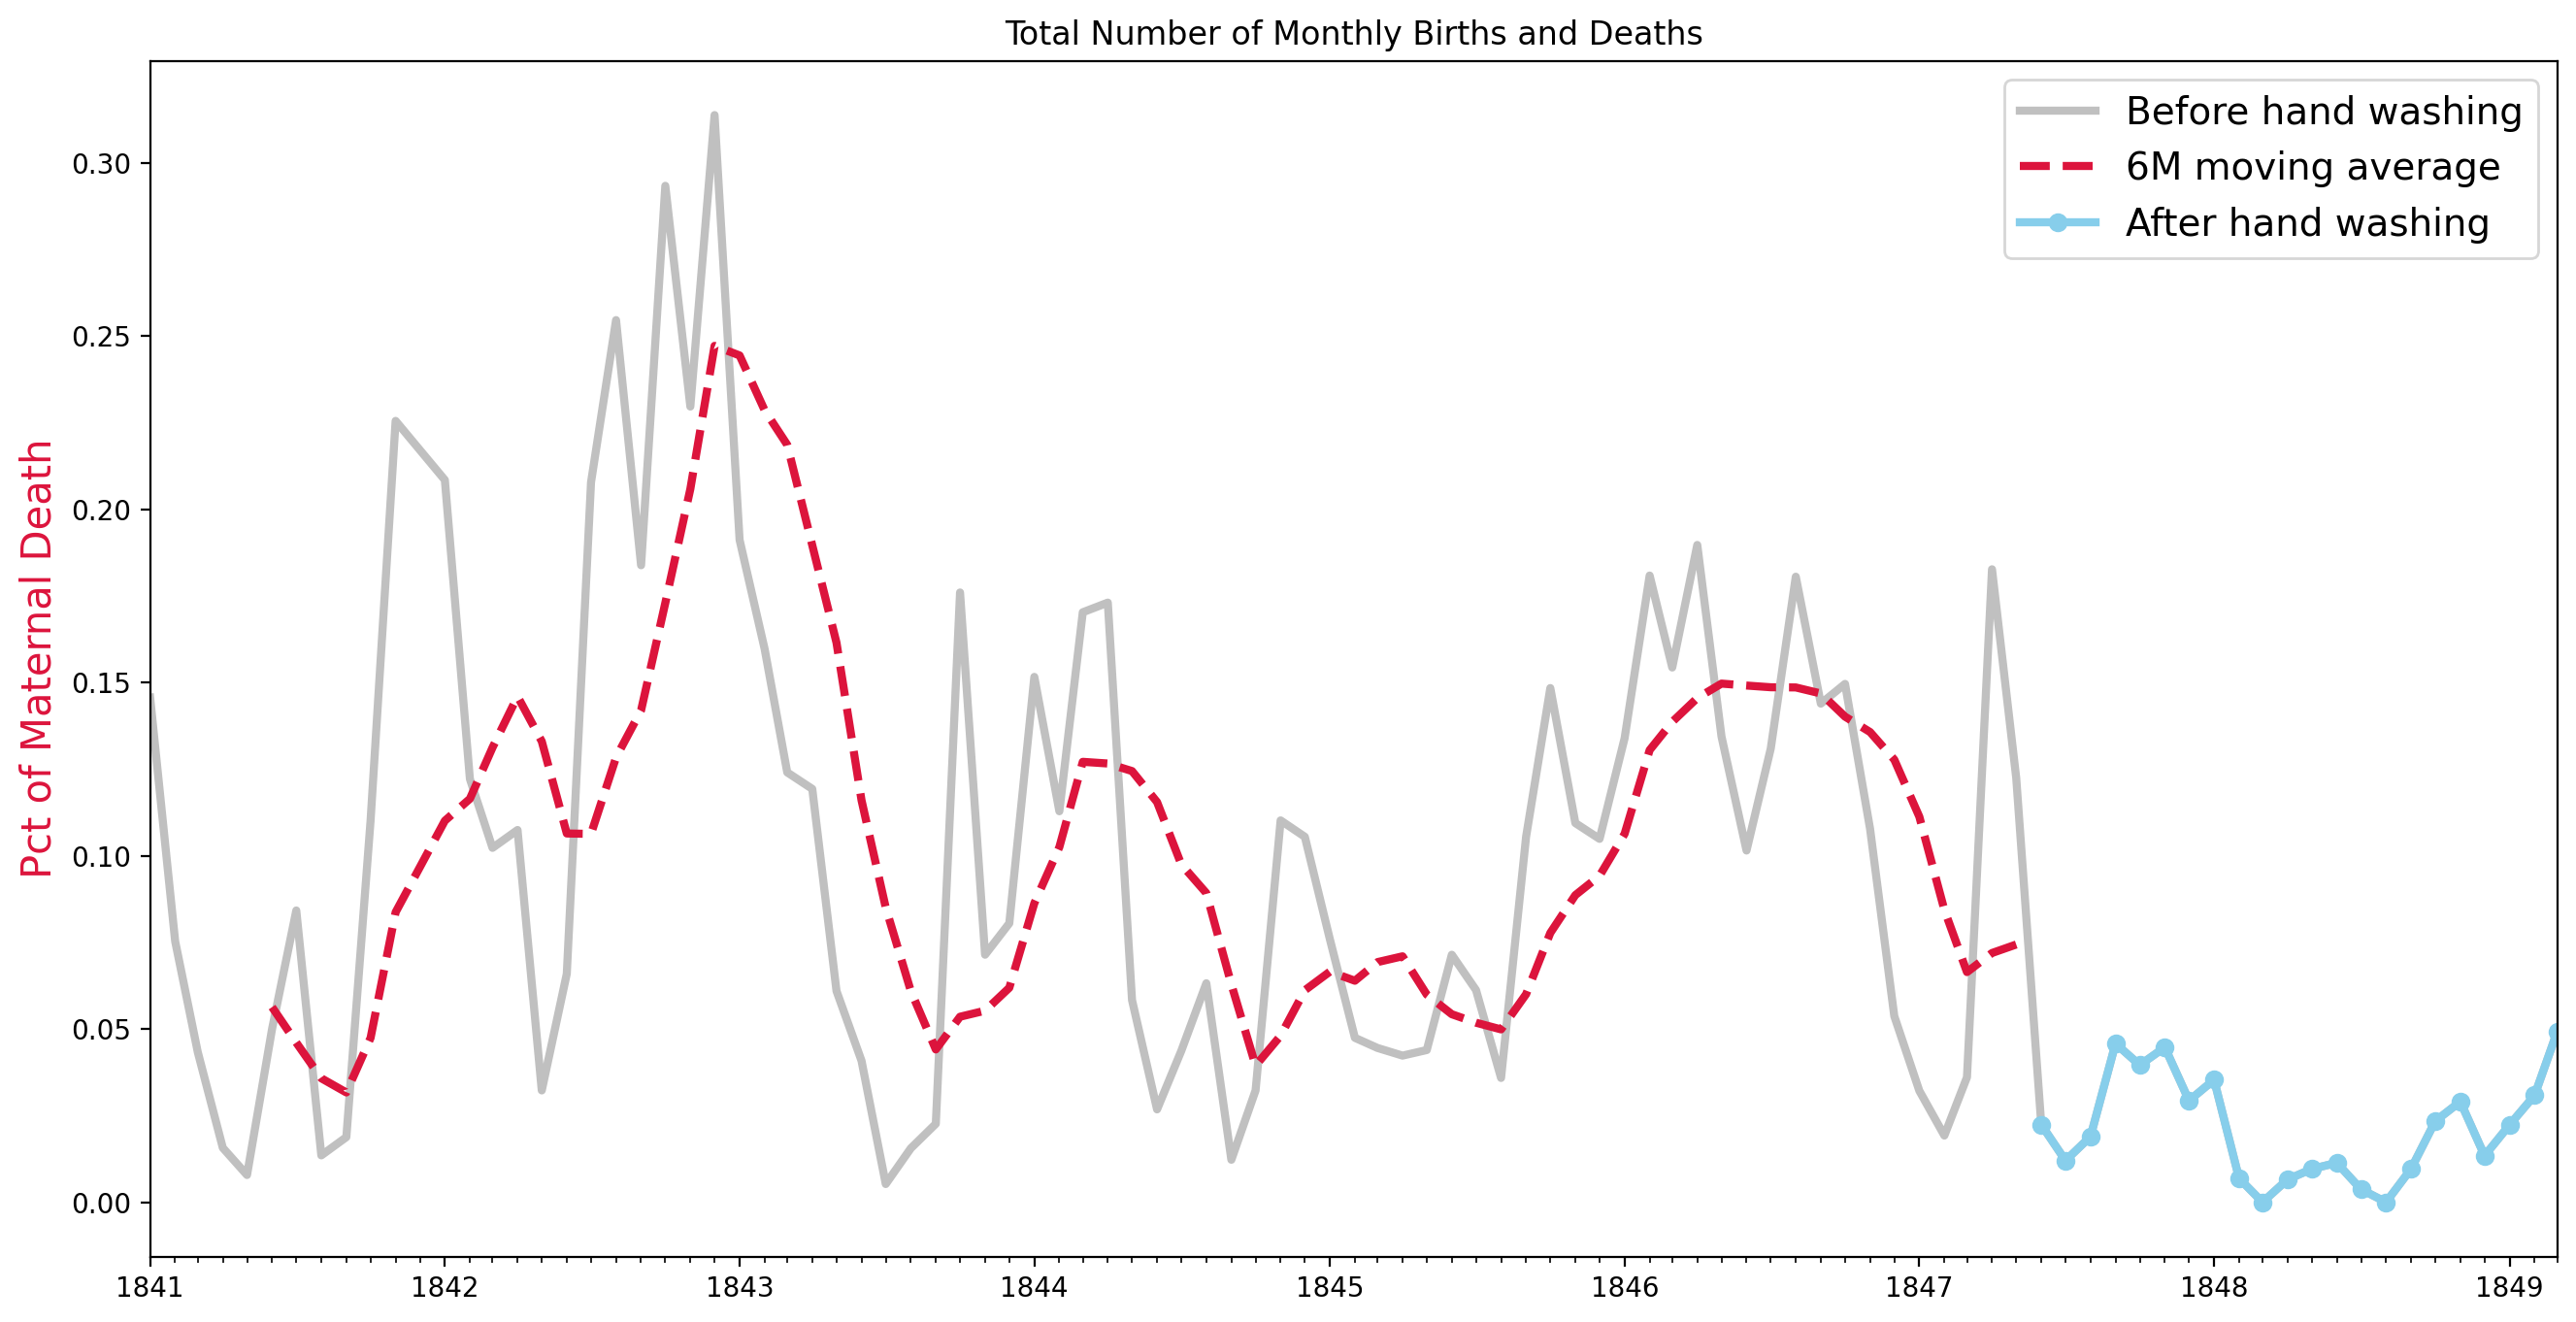

In [ ]:
# Setting up the chart

plt.figure(figsize=(16,8), dpi=200)

plt.title('Total Number of Monthly Births and Deaths')

# Setting up the locators

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

# Capturing the axis

ax1 = plt.gca()


ax1.plot(df_monthly.date, df_monthly.pct_deaths, color='silver', linewidth=3)
ax1.plot(df_monthly_rolling_before.date, df_monthly_rolling_before.pct_deaths,
         color='crimson', linestyle='--', linewidth=3)
ax1.plot(monthly_after.date, monthly_after.pct_deaths, color='skyblue',marker='o', linewidth=3)


# Setting up legends for the graph

ax1.legend(('Before hand washing', '6M moving average', 'After hand washing'), fontsize=14)

# Setting up the labels

ax1.set_ylabel('Pct of Maternal Death', fontsize=15, color='crimson')


# Use the locators to set up the tickmarks

ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)





### Statistics - Calculate the Difference in the Average Monthly Death Rate

Questions to answer:

* What was the average percentage of monthly deaths before handwashing?
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier?
* How many times lower are the chances of dying after handwashing compared to before?

In [ ]:
avg_before = monthly_before.pct_deaths.mean() * 100

print(f'Average percentage of monthly deaths before handwashing is {avg_before: .3}%')

avg_after = monthly_after.pct_deaths.mean() * 100

print(f'Average percentage of monthly deats after handwashing is {avg_after: .2}%')

pct_reduction = avg_before - avg_after
print(f'Hand washing reduces {pct_reduction: .3}% average chance of dying in childbirth')

times = avg_before // avg_after
print(f'Hand washing lowers {times} times chances of dying')

Average percentage of monthly deaths before handwashing is  10.5%
Average percentage of monthly deats after handwashing is  2.1%
Hand washing reduces  8.4% average chance of dying in childbirth
Hand washing lowers 4.0 times chances of dying


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

To do:
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing.
* Then use plotly to create box plot of the data before and after handwashing.
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [ ]:
df_monthly['handwashing_start'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes' )



### Use Histograms to Visualise the Monthly Distribution of Outcomes

Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths.

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable.
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter.

In [ ]:
box_chart = px.box(df_monthly, x='handwashing_start', y='pct_deaths', color='handwashing_start')


box_chart.update_layout(xaxis_title='Washing hands?', yaxis_title='Percentage of Monthly Deaths')
box_chart.show()

In [ ]:
# plotting histogram

hist_chart = px.histogram(df_monthly, x='pct_deaths', color='handwashing_start',
                          opacity=0.6, nbins=30, barmode='overlay', marginal='box', histnorm='percent')

hist_chart.show()

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

**Challenge**: Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after.

* Use the `shade` parameter to give your two distributions different colours.
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem.


<ipython-input-234-30999358083d>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-234-30999358083d>:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




(0.0, 0.4)

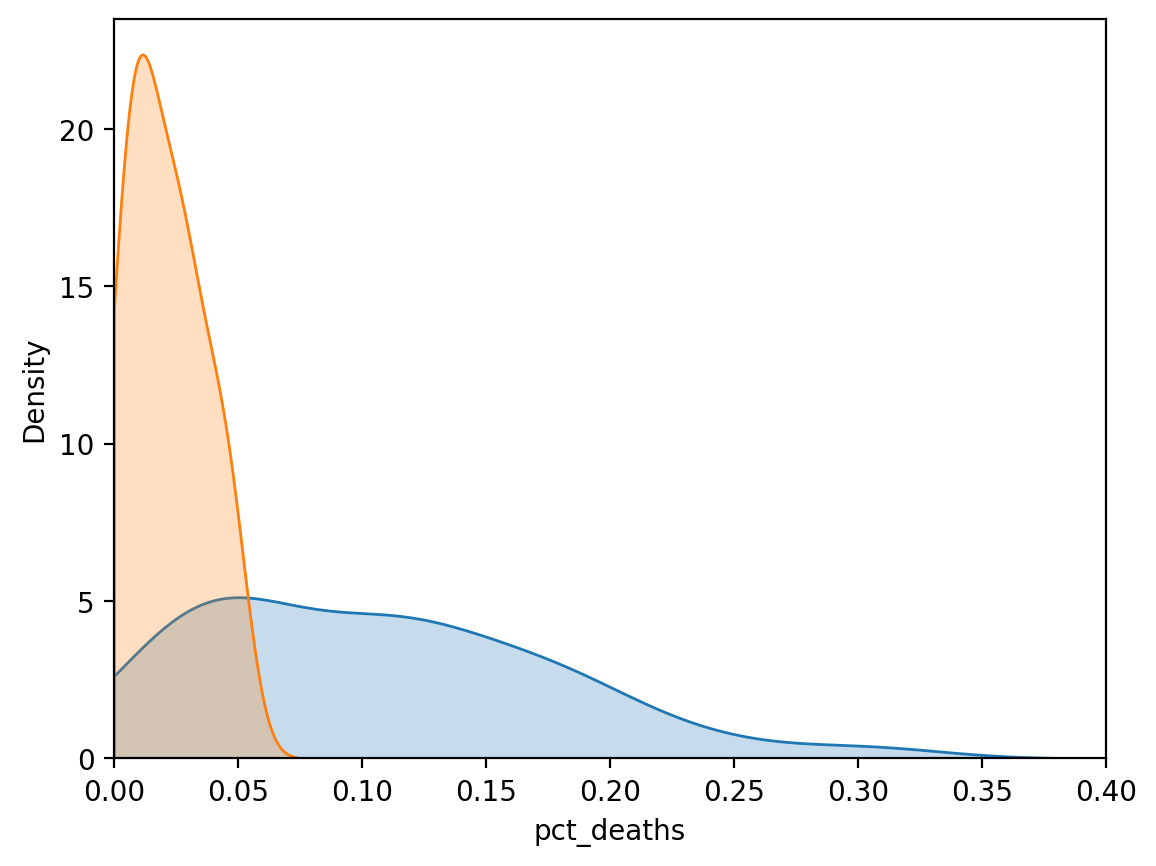

In [ ]:
# Plotting the KDE to visualise the smooth distribution

# Creating two kde plot

plt.figure(dpi=200)

sns.kdeplot(monthly_before.pct_deaths, shade=True, clip=(0,1))
sns.kdeplot(monthly_after.pct_deaths, shade=True, clip=(0,1))

plt.xlim(0,0.40)

### Use a T-Test to Show Statistical Significance

Use a t-test to determine if the differences in the means are statistically significant or purely due to chance.

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate.

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level?



In [ ]:
ttest_obj = stats.ttest_ind(monthly_before.deaths, monthly_after.deaths)

print(f'p-value from the t_test is {ttest_obj.pvalue: .3}')
print(f'statistic value from the t_test is {ttest_obj.statistic: .3}')

p-value from the t_test is  6.68e-07
statistic value from the t_test is  5.32


What do you conclude from your analysis, Doctor? 😊

<img src=https://i.imgur.com/rvjNVzQ.gif>

In [ ]:
# t_test show that there's a distinct difference between two datasets and that hand wahsing makes a diffence in saving lives